In [65]:
import pandas as pd
from datetime import datetime

raw_df = pd.read_csv("stocks.csv")

# Filter the dataset for MSFT stocks
df = raw_df[raw_df['Name'] == 'MSFT']

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

print(df.head())
print('\n...\n')
print(df.tail())

             open   high    low  close    volume  Name
date                                                  
2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT

...

             open    high      low  close    volume  Name
date                                                     
2018-02-01  94.79  96.070  93.5813  94.26  47227882  MSFT
2018-02-02  93.64  93.970  91.5000  91.78  47867753  MSFT
2018-02-05  90.56  93.240  88.0000  88.00  51031465  MSFT
2018-02-06  86.89  91.475  85.2500  91.33  67998564  MSFT
2018-02-07  90.49  91.770  89.2000  89.61  41107592  MSFT


C:\Users\pablo\AppData\Local\Temp\ipykernel_4348\3140818131.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [66]:
df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


Checking for null values

In [67]:
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

Analyzing the dataset

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1259 non-null   float64
 1   high    1259 non-null   float64
 2   low     1259 non-null   float64
 3   close   1259 non-null   float64
 4   volume  1259 non-null   int64  
 5   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 68.9+ KB


In [69]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,95.140000,96.070000,93.720000,95.010000,2.483542e+08


Checking for outliers

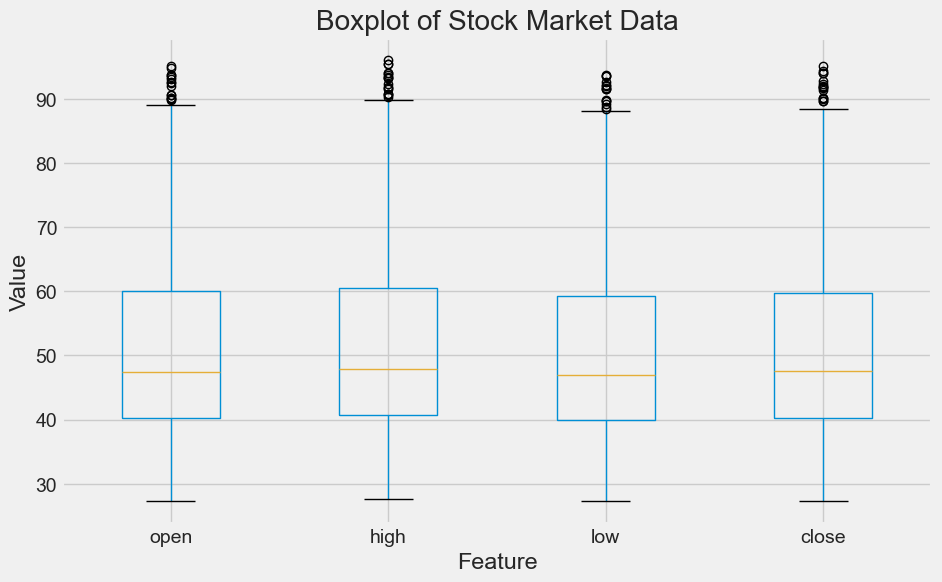

In [70]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

columns = ['open', 'high', 'low', 'close']

df[columns].boxplot(figsize=(10, 6))
plt.title('Boxplot of Stock Market Data')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.show()

Line Charts

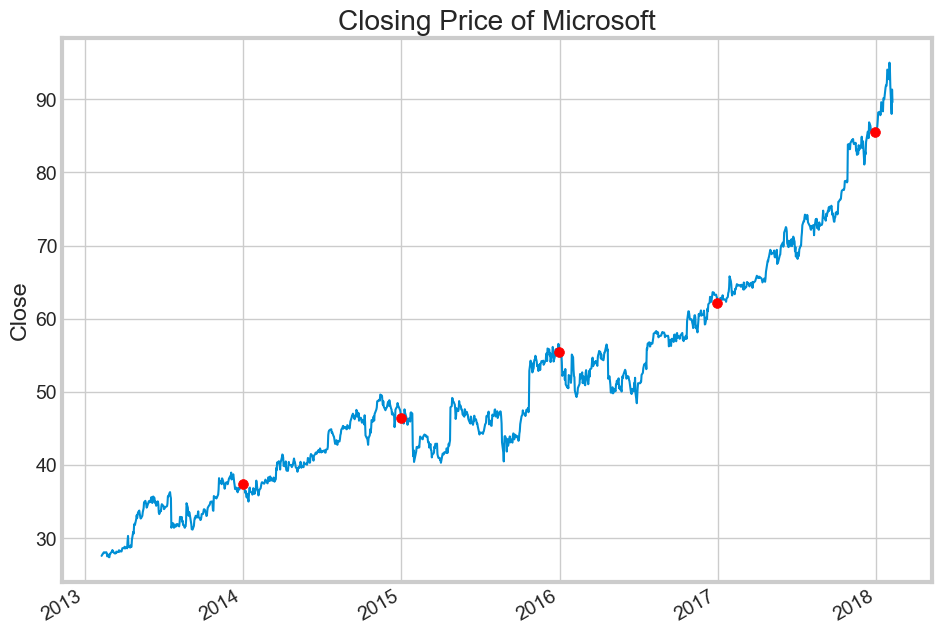

In [89]:
import seaborn as sns
from datetime import datetime

sns.set_style('whitegrid')

ax = df['close'].plot(figsize=(10, 8), zorder=1)

for year in df.index.year.unique():
    if year != 2018:
        last_close = df[df.index.year == year]['close'].iloc[-1]
        plt.scatter(df.index[df.index.year == year][-1], last_close, color='red', s=50)

ax.lines[0].set_linewidth(1.5)

plt.title('Closing Price of Microsoft')
plt.ylabel('Close')
plt.xlabel(None)
plt.show()

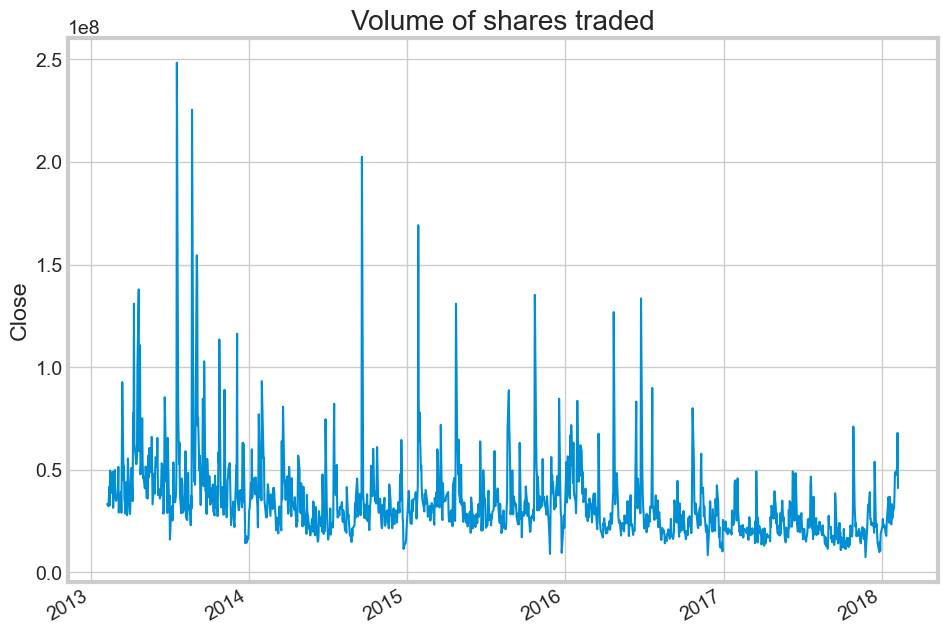

In [94]:
ax = df['volume'].plot(figsize=(10, 8), zorder=1)

ax.lines[0].set_linewidth(1.5)

plt.title('Volume of shares traded')
plt.ylabel('Close')
plt.xlabel(None)
plt.show()